In [131]:
import scanpy as sc
import numpy as np
import episcanpy as epi
import matplotlib.pyplot as plt
import pandas as pd

# 10x mutiome

In [25]:
rna = sc.read('/home/icb/litinetskaya/multigrate/data/10xpbmc10k-2020/expressions_hvg.h5ad')
rna

AnnData object with n_obs × n_vars = 10000 × 4000
    obs: 'cell_type'
    layers: 'count'

In [26]:
np.max(rna.X)

7.1491437

In [28]:
np.max(rna.layers['count'])

844.0

In [27]:
atac = sc.read('/home/icb/litinetskaya/multigrate/data/10xpbmc10k-2020/peaks.h5ad')
atac

AnnData object with n_obs × n_vars = 10000 × 40086
    obs: 'cell_type'
    layers: 'binary'

In [29]:
np.max(atac.layers['binary'])

1.0

In [30]:
np.max(atac.X)

2.6131697

In [31]:
atac.layers['cpm_norm'] = atac.X.copy()
atac.X = atac.layers['binary'].copy()
epi.pp.tfidf(atac)
atac

AnnData object with n_obs × n_vars = 10000 × 40086
    obs: 'cell_type'
    layers: 'binary', 'cpm_norm', 'tf-idf'

In [32]:
np.max(atac.layers['binary']), np.max(atac.layers['cpm_norm']), np.max(atac.layers['tf-idf'])

(1.0, 2.6131697, 0.0023486267)

In [33]:
np.sum(atac.obs_names != rna.obs_names)

0

(array([3.41667057e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.91929430e+07]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

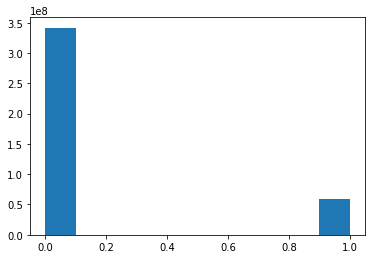

In [34]:
plt.hist(atac.layers['binary'].A.flatten())

(array([3.41667057e+08, 3.00230000e+04, 7.33418700e+06, 3.95129330e+07,
        9.38859000e+06, 1.59657800e+06, 6.99861000e+05, 3.47865000e+05,
        1.72871000e+05, 1.10035000e+05]),
 array([0.        , 0.26131696, 0.5226339 , 0.7839509 , 1.0452678 ,
        1.3065848 , 1.5679018 , 1.8292187 , 2.0905356 , 2.3518527 ,
        2.6131697 ], dtype=float32),
 <BarContainer object of 10 artists>)

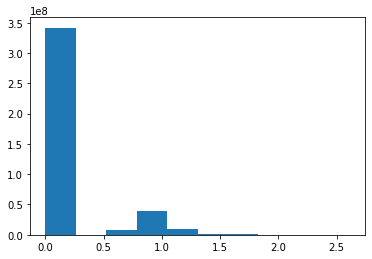

In [35]:
plt.hist(atac.layers['cpm_norm'].A.flatten())

(array([3.92036957e+08, 7.89650500e+06, 5.94910000e+05, 1.94019000e+05,
        7.62590000e+04, 3.37130000e+04, 1.68350000e+04, 7.64400000e+03,
        2.79700000e+03, 3.61000000e+02]),
 array([0.        , 0.00023486, 0.00046973, 0.00070459, 0.00093945,
        0.00117431, 0.00140918, 0.00164404, 0.0018789 , 0.00211376,
        0.00234863], dtype=float32),
 <BarContainer object of 10 artists>)

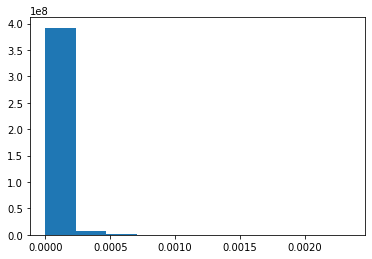

In [36]:
plt.hist(atac.layers['tf-idf'].A.flatten())

In [37]:
rna.write('/storage/groups/ml01/projects/2021_multimil_anastasia.litinetskaya/10xpbmc10k-2020/expressions_hvg.h5ad')

In [38]:
atac.write('/storage/groups/ml01/projects/2021_multimil_anastasia.litinetskaya/10xpbmc10k-2020/peaks.h5ad')